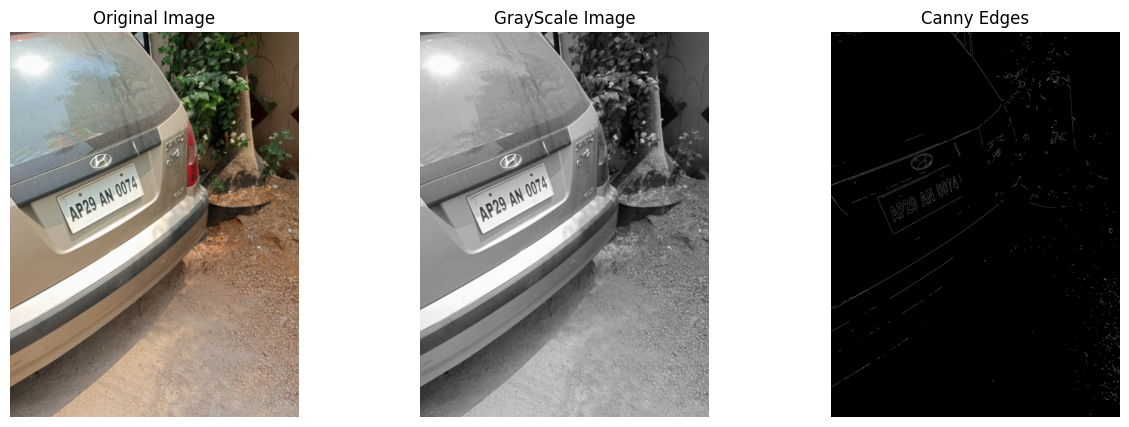

True

In [11]:
# how to read an image
import cv2
import matplotlib.pyplot as plt

# read the image
image = cv2.imread(r'D:\green_skill\dataset\images\train\Datacluster_number_plates (1).jpg')

# Display the original image (convert BGR to RGB for matplotlib)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(1,3,2)
plt.imshow(gray, cmap='gray')
plt.title('GrayScale Image')
plt.axis('off')

# Canny edge detection
edges = cv2.Canny(gray, 100, 200)
plt.subplot(1,3,3)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')
plt.show()

# Save the processed images
cv2.imwrite('gray_image.jpg', gray)


0: 480x640 4 persons, 2 bicycles, 3 cars, 2 motorcycles, 2 trucks, 136.5ms
Speed: 8.5ms preprocess, 136.5ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.



🔍 Detected Number Plate(s):
🅿 Plate 1: 8
🅿 Plate 1: IDLeS 
🅿 Plate 1: F7521
🅿 Plate 1: Ireamjbime 


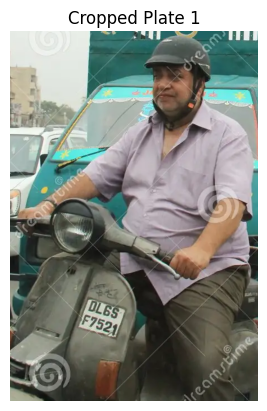

🅿 Plate 2: DL 12CE8717
🅿 Plate 2: bimc


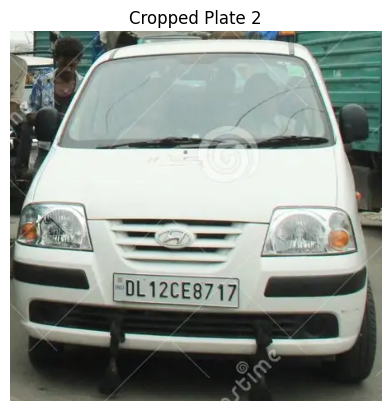

🅿 Plate 3: IDLbCR 36121


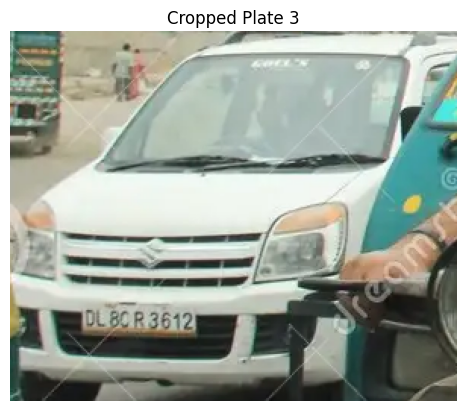

🅿 Plate 4: [DLES 
🅿 Plate 4: F7521
🅿 Plate 4: ~reamstime


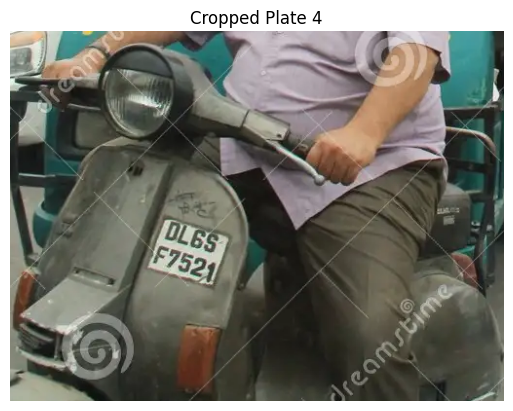

🅿 Plate 5: P
🅿 Plate 5: am
🅿 Plate 5: rblmg
🅿 Plate 5: IDLES 
🅿 Plate 5: 1F7521


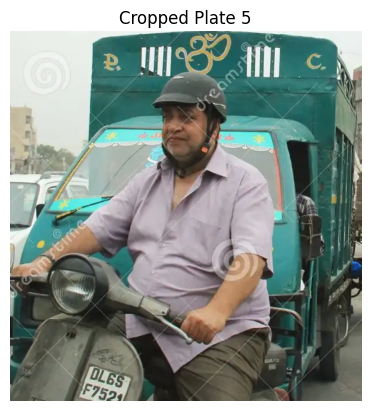

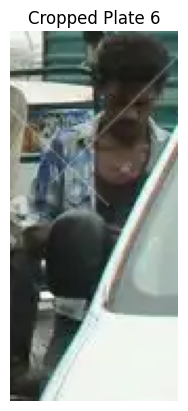

🅿 Plate 7: drcamsbe


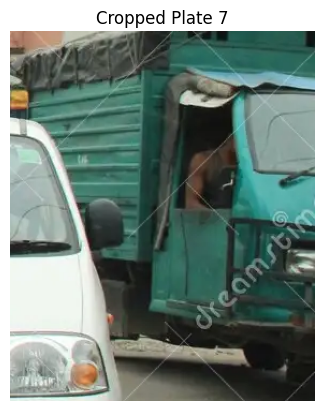

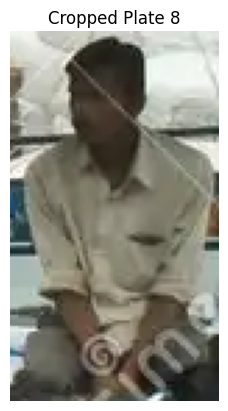

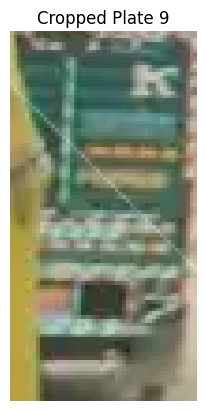

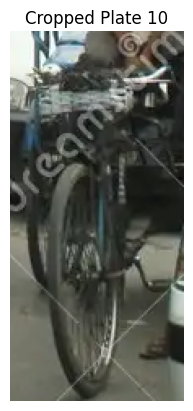

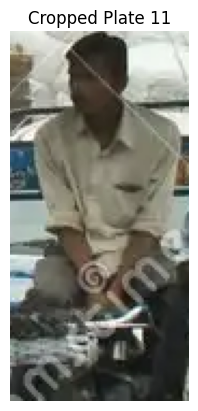

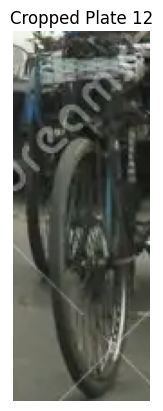

🅿 Plate 13: 1


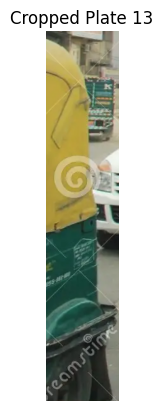

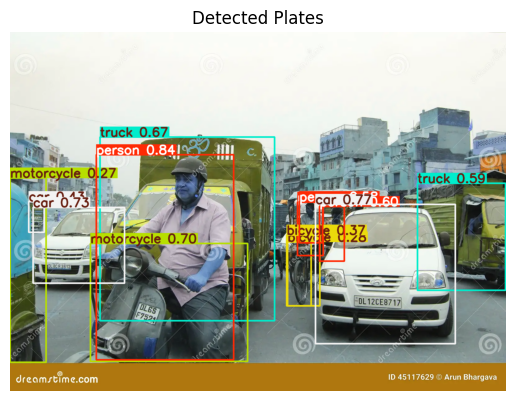

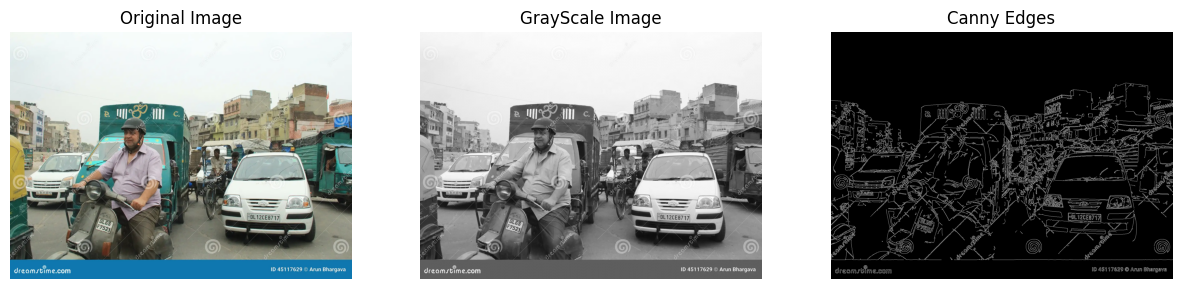

True

In [ ]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO

# Set the image path directly (replace with your image path)
image_path = r'D:\green_skill\img\indian_car_two.jpeg'

# Load image using cv2
image = cv2.imread(image_path)
if image is None:
    print("Failed to load image.")
else:
    # Load YOLO model
    model = YOLO("yolov8n.pt")
    results = model(image)

    boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)

    # Initialize EasyOCR
    reader = easyocr.Reader(['en'])

    print("\n🔍 Detected Number Plate(s):")
    for idx, box in enumerate(boxes):
        x1, y1, x2, y2 = box
        plate_img = image[y1:y2, x1:x2]
        gray = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)

        ocr_result = reader.readtext(gray)
        for detection in ocr_result:
            text = detection[1]
            print(f"🅿 Plate {idx+1}: {text}")

        plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
        plt.title(f"Cropped Plate {idx+1}")
        plt.axis("off")
        plt.show()

    plt.imshow(results[0].plot())
    plt.title("Detected Plates")
    plt.axis("off")
    plt.show()
    
    # Display the original image (convert BGR to RGB for matplotlib)
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.subplot(1,3,2)
    plt.imshow(gray, cmap='gray')
    plt.title('GrayScale Image')
    plt.axis('off')

    # Canny edge detection
    edges = cv2.Canny(gray, 100, 200)
    plt.subplot(1,3,3)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edges')
    plt.axis('off')
    plt.show()

    # Save the processed images
    cv2.imwrite('gray_image.jpg', gray)
